In [1]:
import igraph as ig
import geopandas as gpd
import itertools as it

from eptnr.data_generation.utils.synthetic_data_generation import (
    graph_walking_edges_generation,
    set_eptnr_vertices,
    graph_edge_entry,
)
from eptnr.data_generation.utils.eptnr_vertex import EPTNRVertex
from eptnr.constants.igraph_edge_types import IGraphEdgeTypes
from eptnr.constants.igraph_vertex_types import IGraphVertexTypes
from eptnr.constants.igraph_colors import IGraphColors
from eptnr.data_generation.utils.synthetic_speeds import SyntheticTravelSpeeds

# Graph

In [2]:
g = ig.Graph(directed=True)

In [3]:
vertices = [
    # Residential Centers
    EPTNRVertex(0.5, 0.5, IGraphColors.PURPLE, IGraphVertexTypes.RC_NODE),
    EPTNRVertex(3.5, 3.5, IGraphColors.RED, IGraphVertexTypes.RC_NODE),

    # Public Transport Nodes
    EPTNRVertex(1, 1, IGraphColors.BLUE, IGraphVertexTypes.PT_NODE),
    EPTNRVertex(3, 3, IGraphColors.BLUE, IGraphVertexTypes.PT_NODE),
    EPTNRVertex(3.4, 3.4, IGraphColors.BLUE, IGraphVertexTypes.PT_NODE),

    # Point of Interest Nodes
    EPTNRVertex(2.75, 2.75, IGraphColors.GREEN, IGraphVertexTypes.POI_NODE),
]
set_eptnr_vertices(graph=g, vertices=vertices)


## Edges
### Walking

In [4]:
graph_walking_edges_generation(graph=g, vertices=vertices)


### PT

In [5]:
E_BUS = [
    (vertices[2],vertices[3]),  # Bus_line_1
    (vertices[3],vertices[2]),  # Bus_line_1
    (vertices[3],vertices[4]),  # Bus_line_2
    (vertices[4],vertices[3]),  # Bus_line_2
]
names = list(it.repeat(f'Bus_line_1',2)) + list(it.repeat(f'Bus_line_2',2))

graph_edge_entry(
    graph=g,
    edges=E_BUS,
    names=names,
    speed=SyntheticTravelSpeeds.BUS_SPEED,
    edge_type=IGraphEdgeTypes.BUS,
    color=IGraphColors.PINK,
    round_to_decimals=2,
)


In [6]:
g.es['active'] = 1


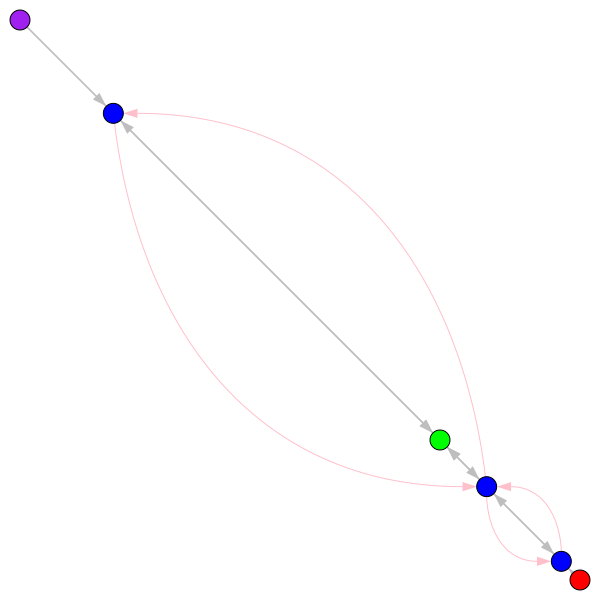

In [7]:
ig.plot(g)


## Write graph to file

In [8]:
g.write_picklez('../datasets/synthetic_1/graph.picklez')

# Census Data

In [9]:
data = {
    'neighborhood': [vertices[0].name, vertices[1].name],
    'n_inh': [1000,100],
    'n_purple': [1000,0],
    'n_red': [0,100],
    'res_centroids': gpd.points_from_xy([vertices[0].x, vertices[1].x], [vertices[0].y, vertices[1].y])
}

gdf = gpd.GeoDataFrame(data, geometry='res_centroids')
gdf

,neighborhood,n_inh,n_purple,n_red,res_centroids
0,RC0,1000,1000,0,POINT (0.50000 0.50000)
1,RC1,100,0,100,POINT (3.50000 3.50000)


## Write graph to file

In [10]:
gdf.to_file('../datasets/synthetic_1/census_data.geojson', driver='GeoJSON')